![image](https://infmedia24.com/wp-content/uploads/2018/10/Google-AI-can-detect-breast-cancer-more-effectively-than-doctors-INF-Media24.png)

---------
**Building AI & ML Framework to predict Breast Cancer by Tensorflow with Python**
====================================


**Contents
- <a href='#1'>1. Load Python libraries and importing the data</a>  
    - <a href='#1.1'>1.1. Loading of Dependent libraries</a> 
    - <a href='#1.2'>1.2. Reading the data from Local File</a> 
    - <a href='#1.3'>1.3. Visualizaing % of Missing values</a> 
    - <a href='#1.4'>1.4. Finding target and drop useless features & Reassigning</a> 
- <a href='#2'>2. Exploratory & Statistical Data Analysis (EDA)</a> 
    - <a href='#2.1'>2.1. Summary of Data Statistics and describe</a> 
    - <a href='#2.2'>2.2. Feature Target distribution (number and %)</a> 
    - <a href='#2.3'>2.3. Features distribution (hue = diagnosis)</a> 
    - <a href='#2.4'>2.4. Correlation matrix between Features</a> 
    - <a href='#2.6'>2.5. Correlated features with Positive Relation</a> 
    - <a href='#2.7'>2.6. Uncorrelated features</a> 
    - <a href='#2.7'>2.7. Correlated features with Negative Relation</a>
    - <a href='#2.7'>2.8. Statistical Analysis amoung the Features</a> 
- <a href='#3'>3. Principal Component Analysis</a>
    - <a href='#3.1'>3.1. Compute PCA reducing Technique</a> 
    - <a href='#3.2'>3.2. PCA pie plot with 6 components with Plotly</a> 
    - <a href='#3.2'>3.3. PCA scatter plot with 2 components with Plotly</a> 
    - <a href='#3.3'>3.4. PCA scatter plot with 3 components with Plotly</a>
    - <a href='#3.3'>3.4. Feature Extraction with PCA</a>    
- <a href='#4'>4. Automating functions for evaluation</a>
    - <a href='#4.1'>4.1. Confusion matrix and show metrics</a> 
    - <a href='#4.2'>4.2. Precision – Recall curve</a> 
    - <a href='#4.3'>4.3. ROC curve</a> 
    - <a href='#4.4'>4.4. Learning curve</a> 
    - <a href='#4.5'>4.5. Cross validation metrics</a> 
- <a href='#5'>5. Prepare dataset</a>
    - <a href='#5.1'>5.1. Define the dataset (X,  y)</a> 
    - <a href='#5.2'>5.2. Standard scaling to bring data into one Scale (X)</a> 
    - <a href='#5.3'>5.3. Train test split using Scikt-Learn</a> 
- <a href='#6'>6. Predictive model 1: Random Forest Regression</a> 
    - <a href='#6.1'>6.1. Feature selection with correlation and random forest classification</a> 
    - <a href='#6.2'>6.2. Univariate feature selection and random forest classification</a> 
    - <a href='#6.3'>6.3. Recursive feature elimination (RFE) with random forest</a> 
    - <a href='#6.4'>6.4. Recursive feature elimination with cross validation and random forest classification</a> 
    - <a href='#6.5'>6.5. Tree based feature selection and random forest classification</a> 
- <a href='#7'>7. Predictive model 2: Logistic Regression</a> 
    - <a href='#7.1'>7.1. Logistic Regression  and GridSearch CV to optimise hyperparameters (accuracy)</a> 
    - <a href='#7.2'>7.2. Recursive features elimination to find important features for prediction</a> 
    - <a href='#7.3'>7.3. Validating learning curves and cross validation scores</a> 
    - <a href='#7.4'>7.4. Selection of threshold value for recall = 100% (all malignant tumors detected)</a> 
    - <a href='#7.5'>7.5. Predicting the model with recall = 100%</a> 

- <a href='#8'>8. Predictive model 3 : Ensemble Classifier to maximise precision and detect all malignant tumors</a>
    - <a href='#8.1'>8.1. Logistic Regression  and GridSearch CV to optimise hyperparameters </a> 
    - <a href='#8.2'>8.2. Voting classifier : log + log2</a> 
    - <a href='#8.3'>8.3. Voting classifier : select threshold recall</a> 
    - <a href='#8.4'>8.4. Voting classifier : predicting with recall </a> 
    - <a href='#8.5'>8.5. Models performance plot (accuracy, precision, recall)</a> 
- <a href='#9'>9. Predictive model 4 : Deep Learning ANN Model using Tensorflow to predict </a>
    - <a href='#9.1'>9.1. ANN+SLP Model (recall)</a> 
    - <a href='#9.2'>9.2. ANN+SLP+PCA Model</a> 
    - <a href='#9.3'>9.3. ANN+MLP Model</a> 
    - <a href='#9.4'>9.4. ANN_MLP+PCA Model</a> 
    - <a href='#9.5'>9.5. Model Validation Results</a> 

**DataSet Repository : [here](https://github.com/aniruddhachoudhury/Artificial-Intelligence-Projects-/tree/master/Chapter1)**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

**Attribute Information:
* ID number 
* Diagnosis (M = malignant, B = benign)  

Ten real-valued features are computed for each cell nucleus: 

* radius (mean of distances from center to points on the perimeter) 
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry 
* fractal dimension ("coastline approximation" - 1)

# Load Python libraries and importing the data

## Loading of Dependent libraries

In [11]:
# Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from itertools import chain
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
warnings.filterwarnings('ignore') #ignore warning messages 

In [12]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA
from pandas.plotting import autocorrelation_plot
from scipy import stats
plt.style.use("ggplot")
from scipy import stats
import os
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")
import time




## Reading the data from Local File

In [13]:
# Read data
data = pd.read_csv('data.csv')
print(data.shape)
data.head()

(569, 33)


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

## Visualizing % of Missing values

In [4]:
def Missing_Analysis(data):
    null_feat = pd.DataFrame(len(data['id']) - data.isnull().sum(), columns = ['Count'])
    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.7, marker=dict(color = 'goldenrod',line=dict(color='#1f77b4',width=1.5)))
    layout = dict(title =  "Missing Values")                
    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
    return 

In [5]:
Missing_Analysis(data)

All features are complete, only 'Unnamed: 32' is completely null, probably an error in the dataset, we drop it in below

## Finding target and drop useless features & Reassigning

In [14]:
# Drop useless variables
data = data.drop(['Unnamed: 32','id'],axis = 1)

# Reassign target
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Exploratory & Statistical Data Analysis (EDA)

## Summary of Data Statistics and describe

In [7]:
# Head
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [8]:
# describe
data.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

## Feature Target distribution (number and %)

In [9]:
# 2 datasets
Malignant= data[(data['diagnosis'] == 1)]
print(len(Malignant))
Benign = data[(data['diagnosis'] == 0)]
print(len(Benign))

212
357


In [10]:
#------------COUNT-----------------------
trace = go.Bar(x = (len(Malignant), len(Benign)), y = ['malignant', 'benign'], orientation = 'h', opacity = 0.8, marker=dict(
        color=[ 'green', 'darkviolet'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of diagnosis variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['benign','malignant'], values = data['diagnosis'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['darkviolet', 'gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of diagnosis variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

## Features distribution (hue = diagnosis)

In [11]:
def plot_distribution(data_select, size_bin) :  
    temp1 = Malignant[data_select]
    temp2 = Benign[data_select]
    hist_data = [temp1, temp2]
    group_labels = ['malignant', 'benign']
    colors = ['#ff7f0e', '#bcbd22']
    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    fig['layout'].update(title = data_select)
    py.iplot(fig, filename = 'Density plot')

Bellow, you can remove the '#' to show all features distribution (except the first line)

In [12]:
#plot distribution 'mean'
plot_distribution('radius_mean', .5)
plot_distribution('texture_mean', .5)
plot_distribution('perimeter_mean', 5)
plot_distribution('area_mean', 10)
plot_distribution('smoothness_mean', .5)
plot_distribution('compactness_mean', .5)
plot_distribution('concavity_mean' ,.5)
plot_distribution('concave points_mean', .5)
plot_distribution('symmetry_mean' ,.5)
plot_distribution('fractal_dimension_mean', .5)

In [13]:
#plot distribution 'se'
plot_distribution('radius_se', .1)
plot_distribution('texture_se', .1)
plot_distribution('perimeter_se', .5)
plot_distribution('area_se', 5)

In [14]:
#plot distribution 'worst'
plot_distribution('radius_worst', .5)
plot_distribution('texture_worst', .5)
plot_distribution('perimeter_worst', 5)
plot_distribution('area_worst', 10)

## Correlation matrix between Features

In [15]:
#correlation
correlation = data.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

In [16]:
correlation[:5] 

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis        1.000000     0.730029      0.415185        0.742636   
radius_mean      0.730029     1.000000      0.323782        0.997855   
texture_mean     0.415185     0.323782      1.000000        0.329533   
perimeter_mean   0.742636     0.997855      0.329533        1.000000   
area_mean        0.708984     0.987357      0.321086        0.986507   

                area_mean  smoothness_mean  compactness_mean  concavity_mean  \
diagnosis        0.708984         0.358560          0.596534        0.696360   
radius_mean      0.987357         0.170581          0.506124        0.676764   
texture_mean     0.321086        -0.023389          0.236702        0.302418   
perimeter_mean   0.986507         0.207278          0.556936        0.716136   
area_mean        1.000000         0.177028          0.498502        0.685983   

                concave points_mean  symmetry_mean  ...  radius_worst  \
diagnosis                  0.776614       0.330499  ...      0.776454   
radius_mean                0.822529       0.147741  ...      0.969539   
texture_mean               0.293464       0.071401  ...      0.352573   
perimeter_mean             0.850977       0.183027  ...      0.969476   
area_mean                  0.823269       0.151293  ...      0.962746   

                texture_worst  perimeter_worst  area_worst  smoothness_worst  \
diagnosis            0.456903         0.782914    0.733825          0.421465   
radius_mean          0.297008         0.965137    0.941082          0.119616   
texture_mean         0.912045         0.358040    0.343546          0.077503   
perimeter_mean       0.303038         0.970387    0.941550          0.150549   
area_mean            0.287489         0.959120    0.959213          0.123523   

                compactness_worst  concavity_worst  concave points_worst  \
diagnosis                0.590998         0.659610              0.793566   
radius_mean              0.413463         0.526911              0.744214   
texture_mean             0.277830         0.301025              0.295316   
perimeter_mean           0.455774         0.563879              0.771241   
area_mean                0.390410         0.512606              0.722017   

                symmetry_worst  fractal_dimension_worst  
diagnosis             0.416294                 0.323872  
radius_mean           0.163953                 0.007066  
texture_mean          0.105008                 0.119205  
perimeter_mean        0.189115                 0.051019  
area_mean             0.143570                 0.003738  

[5 rows x 31 columns]

In [17]:
#Plotting

trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   xgap = 2,
                   ygap = 2,
                   colorscale='Viridis',
                   colorbar   = dict() ,
                  )
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

Let's check the correlation between few features by pair

## Correlated features with Positive Relation

In [18]:
def plot_attributes_Correlation(att1, att2) :  
    trace1 = go.Scatter(
        x = Malignant[att1],
        y = Malignant[att2],
        name = 'Malignant',
        mode = 'markers', 
        marker = dict(color = '#d62728',
            line = dict(
                width = 1)))

    trace2 = go.Scatter(
        x = Benign[att1],
        y = Benign[att2],
        name = 'Benign',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    layout = dict(title = att1 +" "+"vs"+" "+ att2,
                  yaxis = dict(title = att2,zeroline = False),
                  xaxis = dict(title = att1, zeroline = False)
                 )

    plots = [trace1, trace2]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [19]:
plot_attributes_Correlation('texture_mean','texture_worst')
plot_attributes_Correlation('area_mean','radius_worst')
plot_attributes_Correlation('perimeter_mean','radius_worst')
plot_attributes_Correlation('area_worst','radius_worst')

In [20]:
#seaborn version : 
def plot_positive_Correlation(data):
    palette ={0 : 'red', 1 : 'gold'}
    edgecolor = 'grey'

    # Plot +
    fig = plt.figure(figsize=(12,12))

    plt.subplot(221)
    ax1 = sns.scatterplot(x = data['perimeter_mean'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette = palette, edgecolor=edgecolor)
    plt.title('perimeter mean vs radius worst')
    plt.subplot(222)
    ax2 = sns.scatterplot(x = data['area_mean'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
    plt.title('area mean vs radius worst')
    plt.subplot(223)
    ax3 = sns.scatterplot(x = data['texture_mean'], y = data['texture_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
    plt.title('texture mean vs texture worst')
    plt.subplot(224)
    ax4 = sns.scatterplot(x = data['area_worst'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
    plt.title('area mean vs radius worst')
    
    fig.suptitle('Positive correlated features', fontsize = 20)
    plt.savefig('1')
    plt.show()
    return

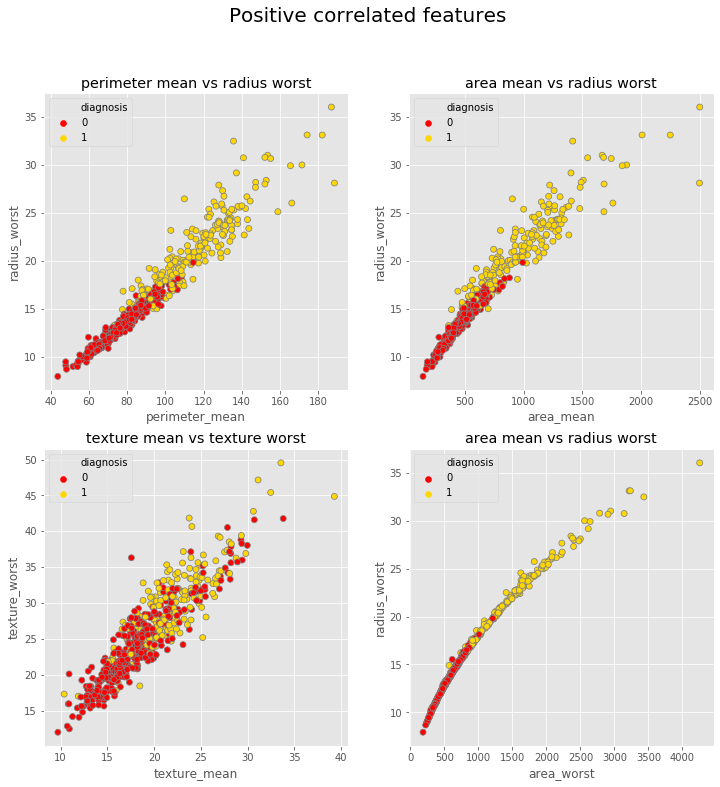

In [21]:
plot_positive_Correlation(data)

## Uncorrelated features

In [22]:
plot_attributes_Correlation('smoothness_mean','texture_mean')
plot_attributes_Correlation('radius_mean','fractal_dimension_worst')
plot_attributes_Correlation('texture_mean','symmetry_mean')
plot_attributes_Correlation('texture_mean','symmetry_se')

In [23]:
# seaborn version : 
def plot_Uncorrelated_Correlation(data):
    palette ={0 : 'green', 1 : 'gold'}
    edgecolor = 'grey'
    fig = plt.figure(figsize=(12,12))

    plt.subplot(221)
    ax1 = sns.scatterplot(x = data['smoothness_mean'], y = data['texture_mean'], hue = "diagnosis", data = data, palette =palette, edgecolor=edgecolor)
    plt.title('smoothness mean vs texture mean')
    plt.subplot(222)
    ax2 = sns.scatterplot(x = data['radius_mean'], y = data['fractal_dimension_worst'], hue = "diagnosis", data = data, palette =palette, edgecolor=edgecolor)
    plt.title('radius mean vs fractal dimension_worst')
    plt.subplot(223)
    ax3 = sns.scatterplot(x = data['texture_mean'], y = data['symmetry_mean'], hue = "diagnosis",data = data, palette =palette, edgecolor=edgecolor)
    plt.title('texture mean vs symmetry mean')
    plt.subplot(224)
    ax4 = sns.scatterplot(x = data['texture_mean'], y = data['symmetry_se'], hue = "diagnosis", data = data, palette =palette, edgecolor=edgecolor)
    plt.title('texture mean vs symmetry se')
    fig.suptitle('Uncorrelated features', fontsize = 20)
    plt.savefig('2')
    plt.show()
    return

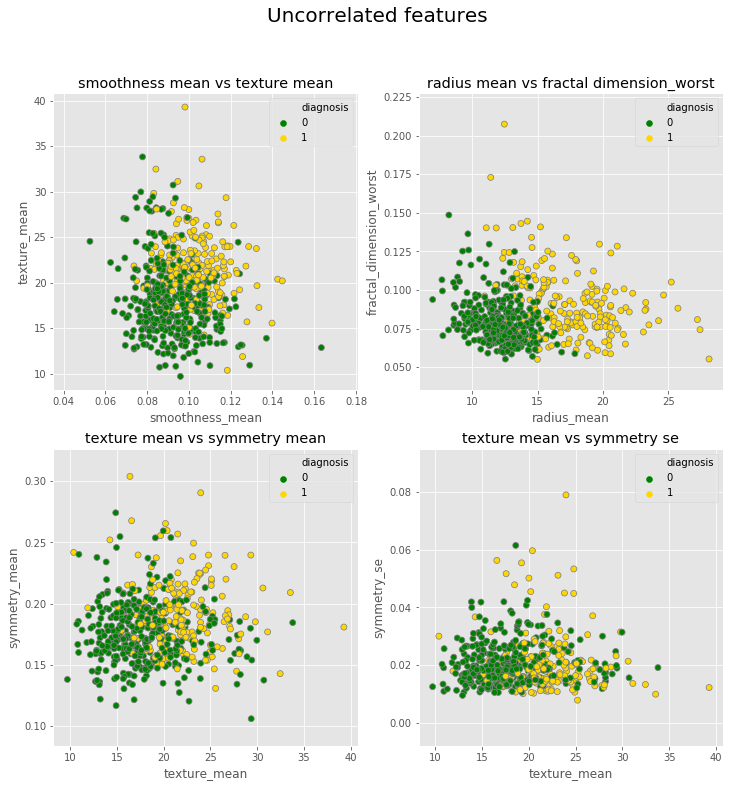

In [24]:
plot_Uncorrelated_Correlation(data)

## Correlated features with Negative Relation

In [25]:
plot_attributes_Correlation('area_mean','smoothness_se')
plot_attributes_Correlation('smoothness_se','perimeter_mean')
plot_attributes_Correlation('area_mean','fractal_dimension_mean')
plot_attributes_Correlation('radius_mean','fractal_dimension_mean')

In [26]:
# seaborn version
def plot_negative_Correlation(data):
    palette ={0 : 'darkblue', 1 : 'green'}
    edgecolor = 'red'
    fig = plt.figure(figsize=(12,12))
    plt.subplot(221)
    ax1 = sns.scatterplot(x = data['area_mean'], y = data['fractal_dimension_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
    plt.title('smoothness mean vs fractal dimension mean')
    plt.subplot(222)
    ax2 = sns.scatterplot(x = data['radius_mean'], y = data['fractal_dimension_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
    plt.title('radius mean vs fractal dimension mean')
    plt.subplot(223)
    ax2 = sns.scatterplot(x = data['area_mean'], y = data['smoothness_se'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
    plt.title('area mean vs fractal smoothness se')
    plt.subplot(224)
    ax2 = sns.scatterplot(x = data['smoothness_se'], y = data['perimeter_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
    plt.title('smoothness se vs perimeter mean')

    fig.suptitle('Negative correlated features', fontsize = 20)
    plt.savefig('3')
    plt.show()
    return

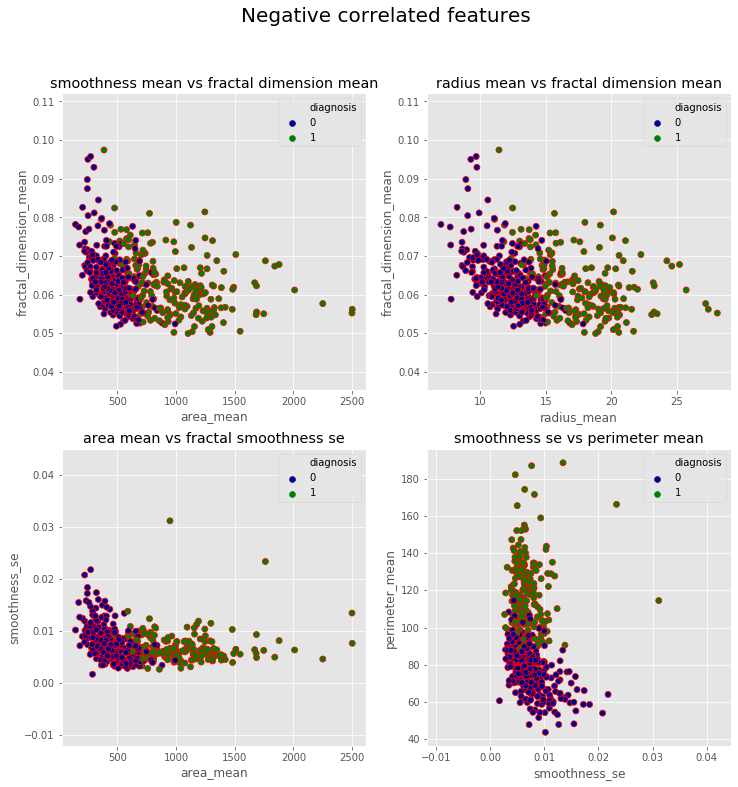

In [27]:
plot_negative_Correlation(data)

## Statistical Analysis amoung the Features

**Cumulative distribution function**
* Cumulative distribution function is the probability that the variable takes a value less than or equal to x. P(X <= x)
* Lets explain in cdf graph of bening radius mean
* in graph, what is P(12 < X)? The answer is 0.5. The probability that the variable takes a values less than or equal to 12(radius mean) is 0.5.
* You can plot cdf with two different method

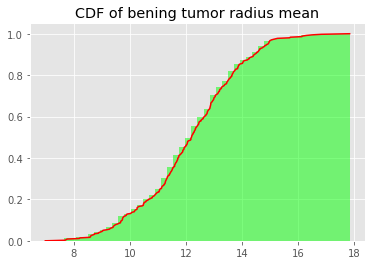

In [28]:
data_bening = data[data["diagnosis"] == 0]
data_malignant = data[data["diagnosis"] == 1]
plt.hist(data_bening.radius_mean,bins=50,fc=(0,1,0,0.5),label='Bening',normed = True,cumulative = True)
sorted_data = np.sort(data_bening.radius_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='red')
plt.title('CDF of bening tumor radius mean')
plt.show()

# Principal Component Analysis

http://www.nlpca.org/pca_principal_component_analysis.html 
http://setosa.io/ev/principal-component-analysis/

## Compute PCA reducing Technique

In [21]:
target_pca = data['diagnosis']
data_pca = data.drop('diagnosis', axis=1)

target_pca = pd.DataFrame(target_pca)

#To make a PCA, normalize data is essential
X_pca = data_pca.values
X_std = StandardScaler().fit_transform(X_pca)

pca = PCA(svd_solver='full')
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std)
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True, how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})

In [18]:
pca_std

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [30]:
pd.DataFrame(pca.explained_variance_ratio_).T

0         1         2         3         4         5         6   \
0  0.44272  0.189712  0.093932  0.066021  0.054958  0.040245  0.022507   

         7         8        9   ...        20        21        22        23  \
0  0.015887  0.013896  0.01169  ...  0.000999  0.000915  0.000811  0.000602   

         24        25       26        27        28        29  
0  0.000516  0.000273  0.00023  0.000053  0.000025  0.000004  

[1 rows x 30 columns]

##  PCA pie plot with 6 components with plotly

In [31]:
#explained_variance 
var_pca = pd.DataFrame(pca.explained_variance_ratio_)
var_pca = var_pca.T

#----------SUM AND DROP COMP [7:30]
col_list = list(v for v in chain(pca_std.columns[6:30])) 
var_pca['OTHERS_COMP'] = var_pca[col_list].sum(axis=1)
var_pca.drop(var_pca[col_list],axis=1,inplace=True)
var_pca = var_pca.T

In [32]:
var_pca.T

0         1         2         3         4         5  OTHERS_COMP
0  0.44272  0.189712  0.093932  0.066021  0.054958  0.040245     0.112412

In [33]:
def plot_PCA():
    labels = ['ATT1','ATT2','ATT3','ATT4','ATT5','ATT6', 'ATT7 - 30']
    colors = ['gold', 'green', 'red', 'lightskyblue', 'orange', 'black', 'white']

    trace = go.Pie(labels = labels, values = var_pca[0].values, opacity = 0.8,
               textfont=dict(size=15),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'PCA : components and explained variance (6 comp = 88.8%)')
 
                   
    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
    return




In [34]:
plot_PCA()

## PCA scatter plot with 2 components with plotly

In [35]:
pca = PCA(n_components = 2)
pca_std = pca.fit(X_std, target_pca).transform(X_std)
pca_std = pd.DataFrame(pca_std,columns = ['ATT1','ATT2'])
pca_std = pca_std.merge(target_pca,left_index = True,right_index = True,how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})

In [36]:
def PCA_scatter(target,color) :
    tracer = go.Scatter(x = pca_std[pca_std['diagnosis'] == target]['ATT1'] ,y = pca_std[pca_std['diagnosis'] == target]['ATT2'],
                        name = target, mode = 'markers',marker = dict(color = color,line = dict(width = 1)))
    return tracer

def plot_scatter():  
    layout = go.Layout(dict(title = 'PCA Scatter plot (2 comp = 63.3%)',
                        xaxis = dict(gridcolor = 'rgb(255, 127, 14)', title = 'ATT1 = 44.3%',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 127, 14)',
                                     title = 'ATT2 = 19.0%',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        height = 800
                       ))
    Trace1 = PCA_scatter('malignant','#bcbd22')
    Trace2 = PCA_scatter('benign','#d62728')
    plots = [Trace2,Trace1]
    fig = go.Figure(data = plots,layout = layout)
    py.iplot(fig)
    return 

In [37]:
plot_scatter()

## PCA scatter plot with 3 components

In [38]:
pca = PCA(n_components = 3)
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std,columns = ['ATT1','ATT2','ATT3'])
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True,how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})

In [39]:
M_pca = pca_std[(pca_std['diagnosis'] == 'malignant')]
B_pca = pca_std[(pca_std['diagnosis'] == 'benign')]

In [40]:
def PCA_scatter_3():
    trace1 = go.Scatter3d(x = M_pca['ATT1'],y = M_pca['ATT3'],z = M_pca['ATT2'],
                      mode = "markers",name = "malignant",
                      marker = dict(size = 4,color = '#9467bd',line = dict(width = 1))
                     )
    trace2 = go.Scatter3d(x = B_pca['ATT1'],y = B_pca['ATT3'],z = B_pca['ATT2'],
                      name = 'benign', mode = 'markers',
                      marker = dict(size = 4,color= '#7EC0EE',line = dict(width = 1))
                     )



    layout = go.Layout(dict(title = 'PCA Scatter plot (3 comp = 72.7%)',
                        scene = dict(camera = dict(up=dict(x= 0 , y=0, z=0),
                                                   center=dict(x=0, y=0, z=0),
                                                   eye=dict(x=1.25, y=1.25, z=1.25)),
                                     xaxis  = dict(title = 'COMP1',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'),
                                     yaxis  = dict(title = 'COMP3',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  ),
                                     zaxis  = dict(title = 'COMP2',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  )),height = 700))
                  

    plots = [trace1,trace2]
    fig  = go.Figure(data = plots,layout = layout)
    py.iplot(fig)
    return

In [41]:
PCA_scatter_3()

# Automating functions for evaluation

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix,is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). 
This part is essential to measure the performance of a model : roc, cross validation, learning curve ...

## Confusion matrix and show metrics

![image](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)

The [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix), also known as the error matrix, allows visualization of the performance of an algorithm :
* true positive (TP) : Malignant tumour correctly identified as malignant
* true negative (TN) : Benign tumour correctly identified as benign
* false positive (FP) : Benign tumour incorrectly identified as malignant 
* false negative (FN) : Malignant tumour incorrectly identified as benign

Metrics : 
* Accuracy : (TP +TN) / (TP + TN + FP +FN)
* Precision : TP / (TP + FP)
* Recall : TP / (TP + FN)


In [42]:
# Confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return


In [43]:
# Show metrics 
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/ ((tp/(tp+fp))+(tp/(tp+fn))))))
    return

## Precision – Recall curve

The [precision-recall](https://en.wikipedia.org/wiki/Precision_and_recall#Recall) curve shows the tradeoff between precision and recall for different threshold Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).[Click here](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c)

![image](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/08/ROC-Curve-Plot-for-a-No-Skill-Classifier-and-a-Logistic-Regression-Model.png)

In [44]:
# Precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

## ROC curve

![image](https://1.bp.blogspot.com/-V9zVron27Sk/Vu2lPMjWyKI/AAAAAAAAA-c/mOaspVP8aEQT1cPWjNwKaOgrCUNYNAsTw/s1600/ROC%2BLogistic%2BRegression.png)
The [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.[Click-here](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

In [45]:
# ROC curve
def plot_roc(fpr, tpr, label):
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
   # plt.xlim([0.0,0.001])
   # plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    return

##  Learning curve

![image](https://scikit-learn.org/stable/_images/sphx_glr_plot_learning_curve_001.png)
The [Learning curve](https://stackoverflow.com/questions/4617365/what-is-a-learning-curve-in-machine-learning) determines cross-validated training and test scores.

In [46]:
# Learning curve
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r",
             label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g",
             label = "Cross-validation score")
    plt.legend(loc = "best")
    return plt

 ##  Cross validation metrics

![image](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)
[Cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.Cross-validation, sometimes called rotation estimation or out-of-sample testing, is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. 

In [47]:
# Cross val metric
def cross_val_metrics(model) :
    scores = ['accuracy', 'precision', 'recall']
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))

# Preparation of dataset for Machine Learning 

##  Defining (X,  y)

* y = diagnosis (target)
* X = features (radius_mean, area_se, ....) 


In [48]:
# Def X and Y
y = np.array(data.diagnosis.tolist())
data1=data
data1 = data1.drop(['diagnosis'], axis=1)
X = np.array(data1.as_matrix())

## Standard scaling to bring data into one Scale (X)

Why do you need to standardize your data ?  For example, a variable that ranges between 0 and 100 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization in effect gives the variable with the larger range a bigger weight in the analysis

In [49]:
# Normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Train test split using Scikt-Learn

In [50]:
# Train_test split
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = random_state)

 # Predictive model 1 : Feature selection & Random Regression

## Feature selection with correlation and random forest classification
    

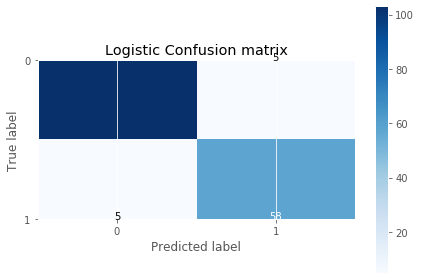

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score



#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)
y_pred = clr_rf.predict(X_test)


# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Logistic Confusion matrix')


In [52]:
cm

array([[103,   5],
       [  5,  58]], dtype=int64)

Accuracy  =     0.942
Precision =     0.921
Recall    =     0.921
F1_score  =     0.921


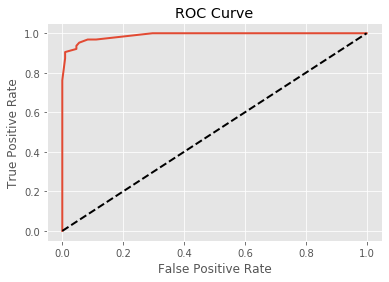

In [53]:
show_metrics()
# Probabilities for each class
clr_probs = clr_rf.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, t = roc_curve(y_test, clr_probs)
plot_roc(fpr, tpr, t)

## Univariate feature selection and random forest classification


In univariate feature selection, we will use [SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) that removes all but the k highest scoring features.

In this method we need to choose how many features we will use. For example, will k (number of features) be 5 or 10 or 15? The answer is only trying or intuitively. I do not try all combinations but I only choose k = 5 and find best 5 features.

In [54]:
y1 = data['diagnosis']
X1 = data.drop(['diagnosis'], axis=1)
# Train_test split
random_state = 42
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.30, random_state = random_state)

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=6).fit(X_train1, y_train1)

In [56]:
dfscores = pd.DataFrame(select_feature.scores_)
dfcolumns = pd.DataFrame(X_train1.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))

              Specs         Score
23       area_worst  75021.734079
3         area_mean  36689.955660
13          area_se   6127.410670
22  perimeter_worst   2405.128351
2    perimeter_mean   1340.610924


In [57]:
print('Score list:', select_feature.scores_)
print('Feature list:', X_train1.columns)

Score list: [1.77946492e+02 6.06916433e+01 1.34061092e+03 3.66899557e+04
 1.00015175e-01 3.41839493e+00 1.30547650e+01 7.09766457e+00
 1.95982847e-01 3.42575072e-04 2.45882967e+01 4.07131026e-02
 1.72696840e+02 6.12741067e+03 1.32470372e-03 3.74071521e-01
 6.92896719e-01 2.01587194e-01 1.39557806e-03 2.65927071e-03
 3.25782599e+02 1.16958562e+02 2.40512835e+03 7.50217341e+04
 2.63226314e-01 1.19077581e+01 2.58858117e+01 8.90751003e+00
 1.00635138e+00 1.23087347e-01]
Feature list: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'c

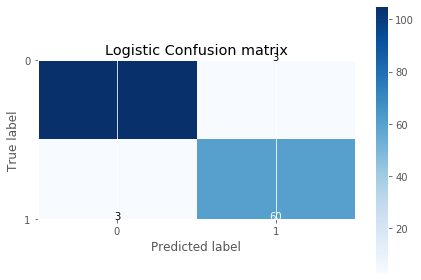

In [58]:
x_train_2 = select_feature.transform(X_train1)
x_test_2 = select_feature.transform(X_test1)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
#ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
#print('Accuracy is: ',ac_2)
#cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
#sns.heatmap(cm_2,annot=True,fmt="d")

y_pred = clr_rf_2.predict(x_test_2)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Logistic Confusion matrix')

In [59]:
cm

array([[105,   3],
       [  3,  60]], dtype=int64)

Accuracy  =     0.965
Precision =     0.952
Recall    =     0.952
F1_score  =     0.952


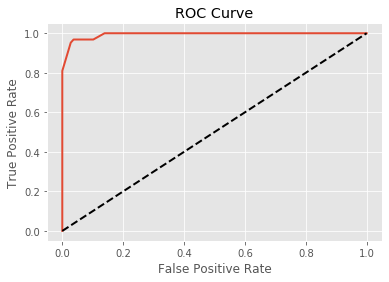

In [60]:
show_metrics()
# Probabilities for each class
clr_probs = clr_rf_2.predict_proba(x_test_2)[:, 1]

# ROC curve
fpr, tpr, t = roc_curve(y_test, clr_probs)
plot_roc(fpr, tpr, t)

Accuracy is almost 96% and as it can be seen in confusion matrix, we make few wrong prediction. What we did up to now is that we choose features according to correlation matrix and according to selectkBest method. Although we use 5 features in selectkBest method accuracies look similar.
Now lets see other feature selection methods to find better results.

## Recursive feature elimination (RFE) with random forest

Basically, it uses one of the classification methods ([random forest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) in our example), assign weights to each of features. Whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features

In [61]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train1, y_train1)


In [62]:
print('Chosen best 5 feature by rfe:',X_train1.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['concave points_mean', 'radius_worst', 'texture_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


Chosen 5 best features by rfe is **perimeter_mean', 'concave points_mean', 'radius_worst', 'area_worst','concave points_worst'**. They are exactly similar with previous (selectkBest) method. Therefore we do not need to calculate accuracy again. Shortly, we can say that we make good feature selection with rfe and selectkBest methods.

## Recursive feature elimination with cross validation and random forest classification

[Click-Here](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html)
Now we will not only **find best features** but we also find **how many features do we need** for best accuracy.

In [63]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train1, y_train1)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train1.columns[rfecv.support_])

Optimal number of features : 14
Best features : Index(['radius_mean', 'texture_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'area_se', 'concavity_se', 'concave points_se',
       'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst',
       'concave points_worst', 'symmetry_worst'],
      dtype='object')


Finally, we find best 11 features that are **texture_mean, area_mean, concavity_mean, texture_se, area_se, concavity_se, symmetry_se, smoothness_worst, concavity_worst, symmetry_worst and fractal_dimension_worst** for best classification. Lets look at best accuracy with plot.


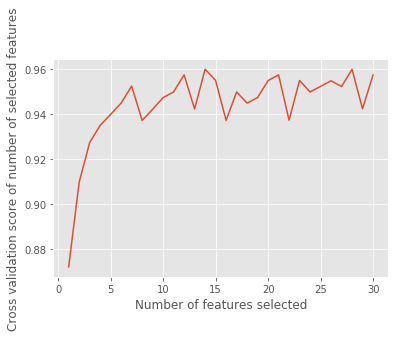

In [64]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## Tree based feature selection and random forest classification

In [random forest classification](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) method there is a **feature_importances_** attributes that is the feature importances (the higher, the more important the feature). **!!! To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.**

Feature ranking:
1. feature 22 (0.213040)
2. feature 20 (0.142009)
3. feature 23 (0.090271)
4. feature 7 (0.086210)
5. feature 27 (0.085083)
6. feature 6 (0.080787)
7. feature 3 (0.068497)
8. feature 10 (0.039659)
9. feature 13 (0.027754)
10. feature 14 (0.019461)
11. feature 1 (0.018773)
12. feature 26 (0.018768)
13. feature 21 (0.015393)
14. feature 25 (0.012332)
15. feature 9 (0.010582)
16. feature 24 (0.009587)
17. feature 11 (0.009377)
18. feature 2 (0.007899)
19. feature 18 (0.006499)
20. feature 16 (0.006023)
21. feature 15 (0.005348)
22. feature 0 (0.005305)
23. feature 28 (0.005255)
24. feature 12 (0.003772)
25. feature 4 (0.003701)
26. feature 8 (0.003699)
27. feature 17 (0.001905)
28. feature 5 (0.001670)
29. feature 19 (0.001340)
30. feature 29 (0.000000)


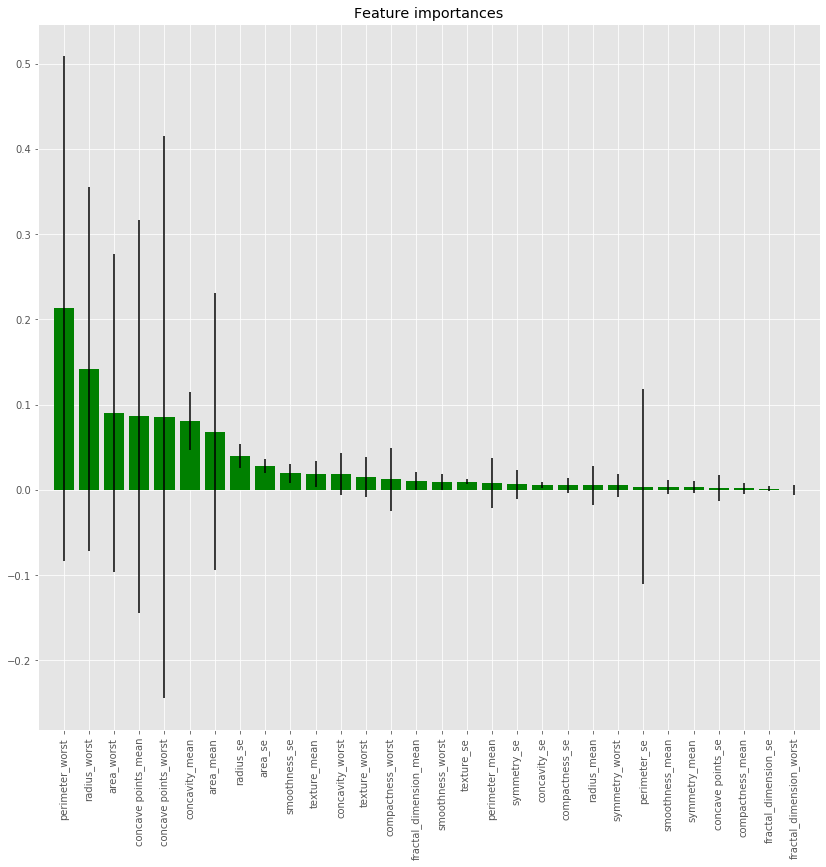

In [65]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train1,y_train1)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train1.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train1.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train1.shape[1]), X_train1.columns[indices],rotation=90)
plt.xlim([-1, X_train1.shape[1]])
plt.show()

## Feature Extraction

We will use principle component analysis (PCA) for [feature extraction](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Before PCA, we need to normalize data for better performance of PCA.

Text(0, 0.5, 'explained_variance_ratio_')

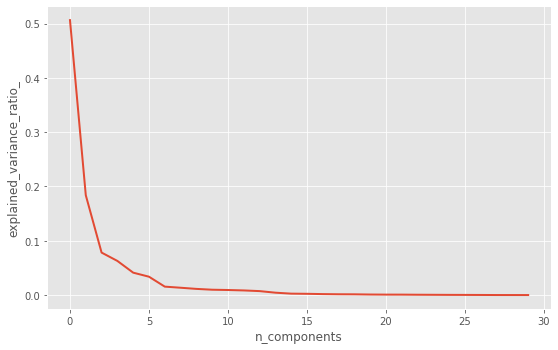

In [66]:
x_train_N = (X_train1-X_train1.mean())/(X_train1.max()-X_train1.min())
x_test_N = (X_test1-X_test1.mean())/(X_test1.max()-X_test1.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(10, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

 # Predictive model 2 : Logistic Regression

## Logistic Regression  and GridSearch CV to optimise hyperparameters (accuracy)

In [67]:
# Find best hyperparameters (accuracy)
log_clf = LogisticRegression(random_state = random_state)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)
CV_log_clf.fit(X_train, y_train)

best_parameters = CV_log_clf.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The best parameters for using this model is {'C': 0.1, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    2.6s finished


[0 1 1 0 0 1 1 1 0 0]
[-1.39647408  6.03409622  3.05177027 -3.82456261 -5.2739228  13.9236428
 11.37583806  1.84890262 -0.15137762 -4.25061055]


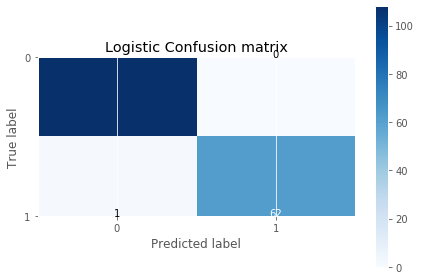

[[108   0]
 [  1  62]]
Accuracy  =     0.994
Precision =     1.000
Recall    =     0.984
F1_score  =     0.992


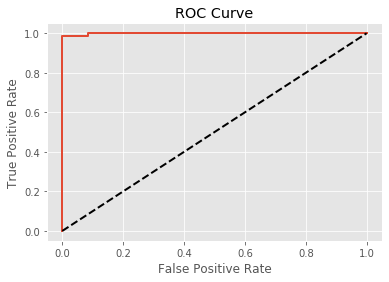

In [110]:
#Log with best hyperparameters
CV_log_clf = LogisticRegression(C = best_parameters['C'], 
                                penalty = best_parameters['penalty'], 
                                random_state = random_state)

CV_log_clf.fit(X_train, y_train)
y_pred = CV_log_clf.predict(X_test)
y_score = CV_log_clf.decision_function(X_test)
print(y_pred[:10])
print(y_score[:10])
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Logistic Confusion matrix')
#plt.savefig('6')
plt.show()
print(cm)

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc(fpr, tpr, t)

## Recursive features elimination to find important features for prediction

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model’s coef_ or feature_importances_

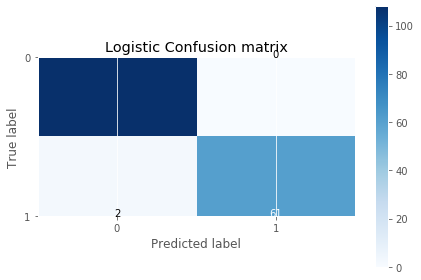

Accuracy  =     0.988
Precision =     1.000
Recall    =     0.968
F1_score  =     0.984


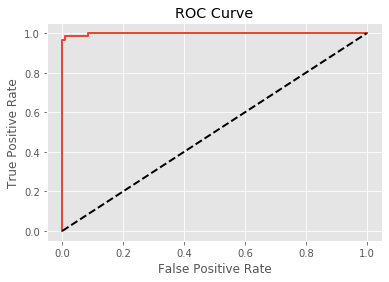

In [69]:
#Logistic regression with RFE
log_clf = LogisticRegression(C = best_parameters['C'], 
                                 penalty = best_parameters['penalty'], 
                                 random_state = random_state)

selector = RFE(log_clf)
selector = selector.fit(X_train, y_train)

y_pred = selector.predict(X_test)
y_score = selector.predict_proba(X_test)[:,1]


# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Logistic Confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc(fpr, tpr, t)

In [70]:
# support and ranking RFE
print(selector.support_)
print(selector.ranking_)

[ True  True  True  True False False False  True False False  True False
 False  True False False False False False False  True  True  True  True
  True False  True  True  True False]
[ 1  1  1  1  6 14  2  1 13  7  1 16  4  1 12  5 15 10  9  3  1  1  1  1
  1  8  1  1  1 11]


## Validating learning curves and cross validation scores

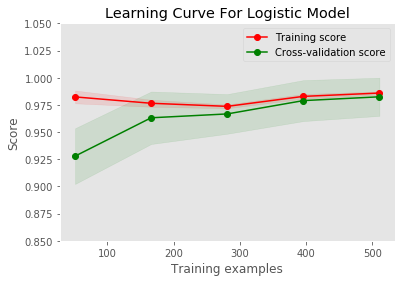

In [71]:
#Learning curve Log with best hyperpara
plot_learning_curve(CV_log_clf, 'Learning Curve For Logistic Model', X, y, (0.85,1.05), 10)
#plt.savefig('7')
plt.show()

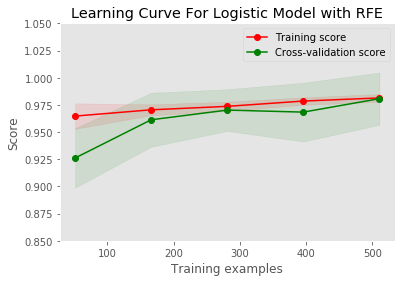

In [72]:
#Learning curve Log with RFE
plot_learning_curve(selector, 'Learning Curve For Logistic Model with RFE', X, y, (0.85,1.05), 10)
plt.show()

In [73]:
# Cross val Log 
cross_log = cross_val_metrics(CV_log_clf)

[accuracy] : 0.98242 (+/- 0.00560)
[precision] : 0.99036 (+/- 0.01181)
[recall] : 0.96235 (+/- 0.01131)


In [74]:
# Cross val Log with RFE
cross_selector = cross_val_metrics(selector)

[accuracy] : 0.97367 (+/- 0.00778)
[precision] : 0.98094 (+/- 0.01754)
[recall] : 0.94817 (+/- 0.01753)


With only 15 features and 5 folds, we got an accuracy of 97.4 with a standard deviation of 0.78.
To follow, we don't use the selector, the log cfl is most performant but the code is here for you :)

## Selection of threshold value for recall = 100% (all malignant tumors detected)

For this study, the most important is to detect all malignants tumours. 

Recall w/ threshold = 0.1 : 1.0
Recall w/ threshold = 0.2 : 1.0
Recall w/ threshold = 0.3 : 0.9841269841269841
Recall w/ threshold = 0.4 : 0.9841269841269841
Recall w/ threshold = 0.5 : 0.9841269841269841
Recall w/ threshold = 0.6 : 0.9523809523809523
Recall w/ threshold = 0.7 : 0.9365079365079365
Recall w/ threshold = 0.8 : 0.873015873015873
Recall w/ threshold = 0.9 : 0.8412698412698413


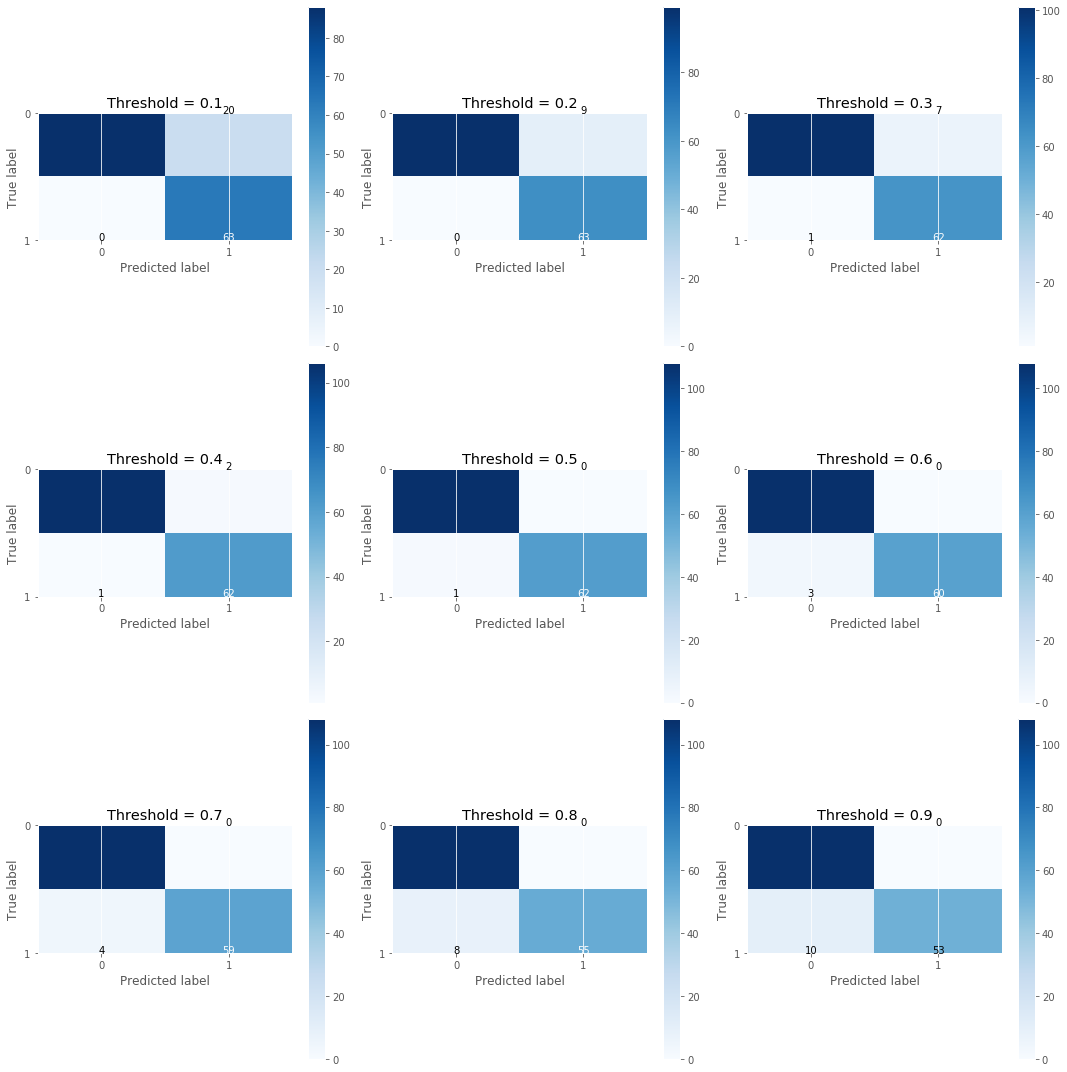

In [75]:
# Threshold
thresholds_adj = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize = (15,15))

j = 1
for i in thresholds_adj:
    y_score = CV_log_clf.predict_proba(X_test)[:,1] > i
    
    
    plt.subplot(3,3,j)
    j += 1
    
    cm = confusion_matrix(y_test, y_score)
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]

    print('Recall w/ threshold = %s :'%i, (tp/(tp+fn)))
    
    class_names = [0,1]
    plot_confusion_matrix(cm, 
                          classes=class_names, 
                          title='Threshold = %s'%i) 

## Predicting with recall = 100%

In [76]:
# Recall = 1.
y_score = CV_log_clf.predict_proba(X_test)[:,1] > 0.1
cm = confusion_matrix(y_test, y_score)
class_names = [0,1]
show_metrics()

Accuracy  =     0.883
Precision =     0.759
Recall    =     1.000
F1_score  =     0.863


With 2 models we can increase the precision while keeping a recall = 100%

 # Predictive model 3 : Ensemble Classifier to maximise precision and detect all malignant tumors

## Logistic Regression  and GridSearch CV to optimise hyperparameters

In [77]:
# Find the best parameters (recall)
log2_clf = LogisticRegression(random_state = random_state)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            }

CV_log2_clf = GridSearchCV(estimator = log2_clf, param_grid = param_grid , scoring = 'recall', verbose = 1, n_jobs = -1)
CV_log2_clf.fit(X_train, y_train)

best_parameters = CV_log2_clf.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The best parameters for using this model is {'C': 0.1, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.2s finished


In [78]:
# Log w best hyperparameters
CV_log2_clf = LogisticRegression(C = best_parameters['C'], 
                                 penalty = best_parameters['penalty'], 
                                 random_state = random_state)


CV_log2_clf.fit(X_train, y_train)

y_pred = CV_log2_clf.predict(X_test)
y_score = CV_log2_clf.decision_function(X_test)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]

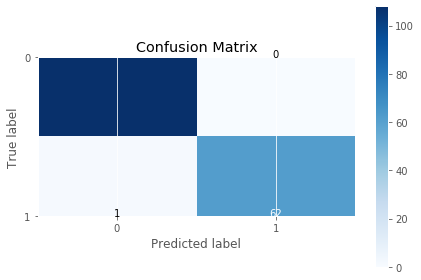

In [79]:
 plot_confusion_matrix(cm, 
                          classes=class_names, 
                          title='Confusion Matrix') 

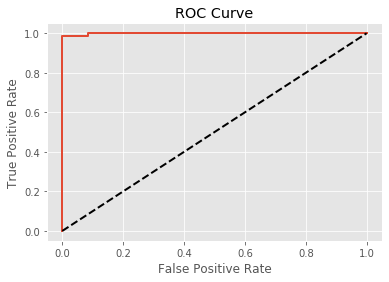

In [80]:
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc(fpr, tpr, t)

* Grid search CV accuracy, penalty = l2
* Grid search CV recall,  penalty = l1

In [81]:
# Cross val log2
cross_val_metrics(CV_log2_clf)

[accuracy] : 0.98242 (+/- 0.00560)
[precision] : 0.99036 (+/- 0.01181)
[recall] : 0.96235 (+/- 0.01131)


## Voting classifier : logistic1 + logistics2 

In [82]:
#Voting Classifier
voting_clf = VotingClassifier (
        estimators = [('log1', CV_log_clf), ('log_2', CV_log2_clf)],
                     voting='soft', weights = [1, 1])
    
voting_clf.fit(X_train,y_train)

y_pred = voting_clf.predict(X_test)
y_score = voting_clf.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
show_metrics()

Accuracy  =     0.994
Precision =     1.000
Recall    =     0.984
F1_score  =     0.992


In [83]:
# Cross val score voting
cross_voting = cross_val_metrics(voting_clf)

[accuracy] : 0.98242 (+/- 0.00560)
[precision] : 0.99036 (+/- 0.01181)
[recall] : 0.96235 (+/- 0.01131)


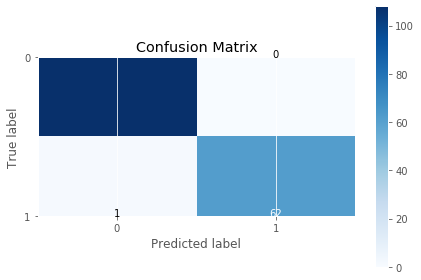

In [84]:
plot_confusion_matrix(cm, 
                          classes=class_names, 
                          title='Confusion Matrix')   

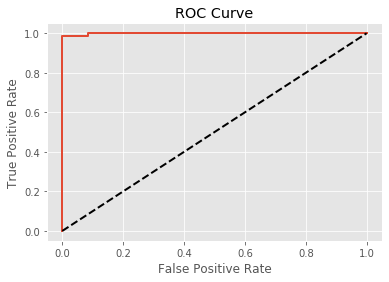

In [85]:
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc(fpr, tpr, t) 

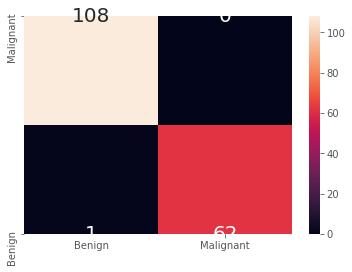

In [86]:
df_cm = pd.DataFrame(cm, ['Malignant', 'Benign'],['Benign', 'Malignant'])
sns.heatmap(df_cm, annot=True, annot_kws={'size':20}, fmt='g')
plt.show()

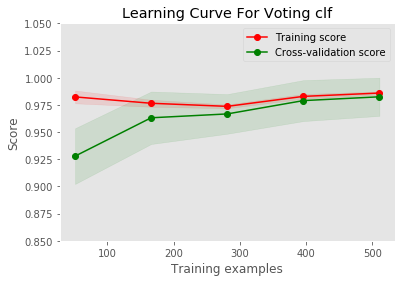

In [87]:
#Learning curve Voting
plot_learning_curve(voting_clf, 'Learning Curve For Voting clf', X, y, (0.85,1.05), 10)
#plt.savefig('9')
plt.show()

 ##  Voting classifier : select threshold recall

Recall w/ threshold = 0.1 : 1.0
Recall w/ threshold = 0.2 : 1.0
Recall w/ threshold = 0.3 : 0.9841269841269841
Recall w/ threshold = 0.4 : 0.9841269841269841
Recall w/ threshold = 0.5 : 0.9841269841269841
Recall w/ threshold = 0.6 : 0.9523809523809523
Recall w/ threshold = 0.7 : 0.9365079365079365
Recall w/ threshold = 0.8 : 0.873015873015873
Recall w/ threshold = 0.9 : 0.8412698412698413


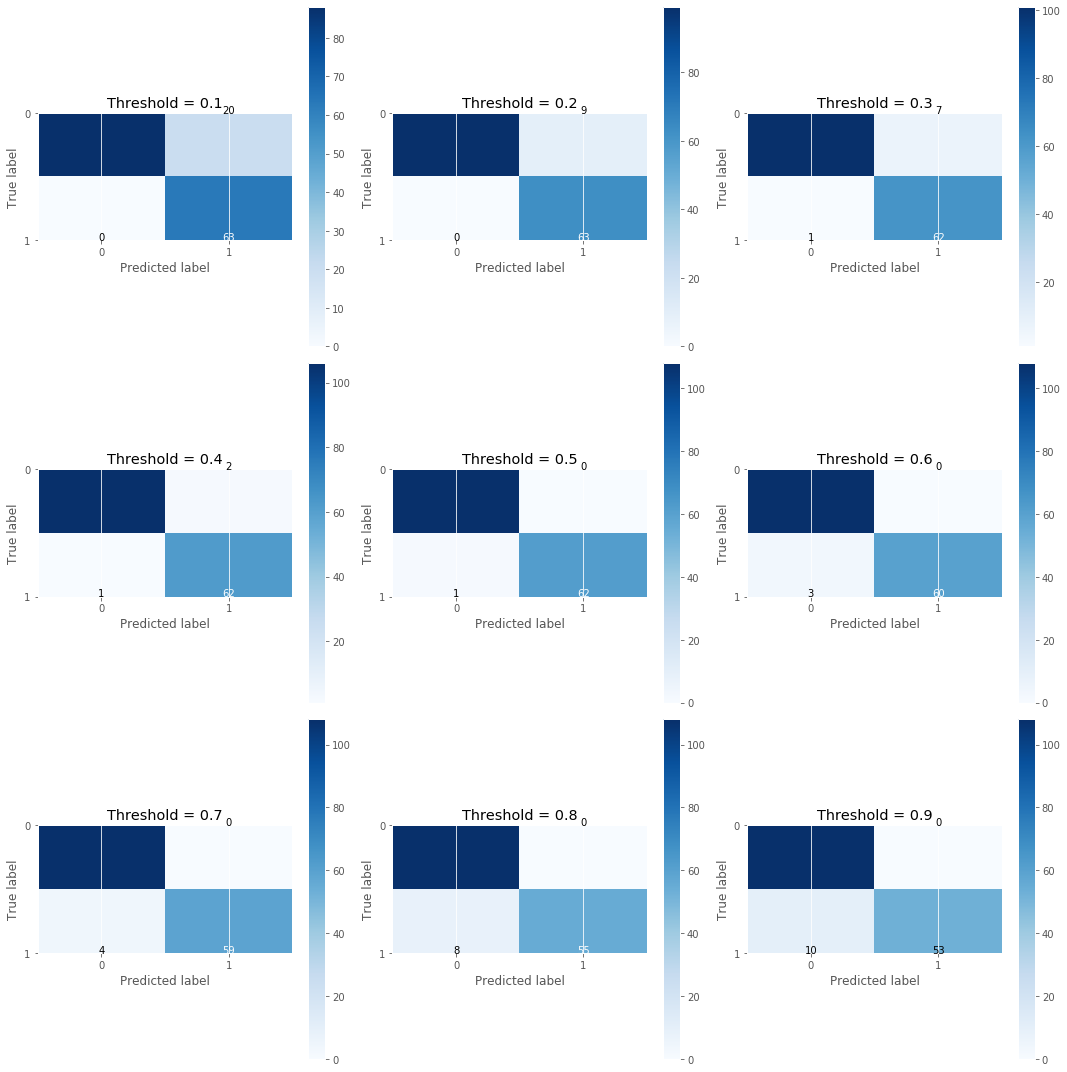

In [88]:
# Threshold
thresholds_adj = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize = (15,15))

j = 1
for i in thresholds_adj:
    y_score = voting_clf.predict_proba(X_test)[:,1] > i
    
    
    plt.subplot(3,3,j)
    j += 1
    
    cm = confusion_matrix(y_test, y_score)
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]

    print('Recall w/ threshold = %s :'%i, (tp/(tp+fn)))
    
    class_names = [0,1]
    plot_confusion_matrix(cm, 
                          classes=class_names, 
                          title='Threshold = %s'%i) 

## Voting classifier : predicting with recall and precision

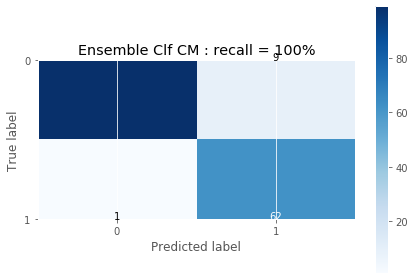

Accuracy  =     0.942
Precision =     0.873
Recall    =     0.984
F1_score  =     0.925


In [89]:
# Ensemble, recall = 1.
y_score = voting_clf.predict_proba(X_test)[:,1] > 0.23
cm = confusion_matrix(y_test, y_score)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'Ensemble Clf CM : recall = 100%')
#plt.savefig('8')
plt.show()

show_metrics()


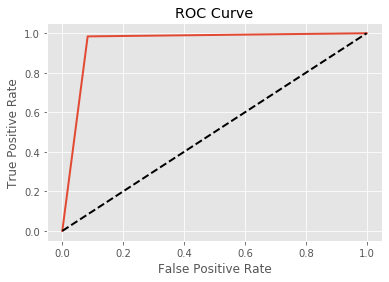

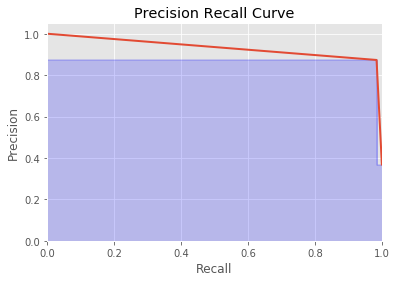

In [90]:
# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc(fpr, tpr, t)

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

## Models performance plot (accuracy, precision, recall)

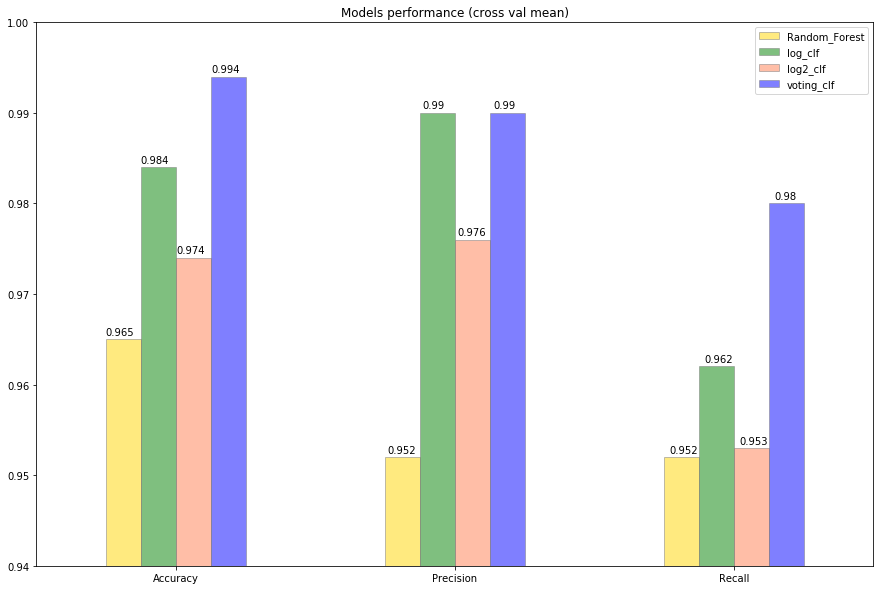

In [4]:
models_score = {'Random_Forest': [0.965, 0.952, 0.952],
                'log_clf': [0.984, 0.990, 0.962], 
                 'log2_clf' : [0.974,0.976,0.953],
                 'voting_clf' : [0.994,0.99,0.98]
                }
Performance = pd.DataFrame(data = models_score)
Performance.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall'}, 
                 inplace=True)
ax = Performance.plot(kind='bar', figsize = (15,10), ylim = (0.94, 1), 
        color = ['gold', 'green', 'coral', 'blue'],
        rot = 0, title ='Models performance (cross val mean)',
        edgecolor = 'grey', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()

# Predictive model 4 : Deep Learning ANN Model using Tensorflow to predict 

---

## ANN & SLP
###  ANN(Artificial Neural Network)
* The Artificial Neural Network consists of an input layer, a hidden layer, and an output layer.

![Imgur](https://miro.medium.com/max/2076/1*LaEgAU-vdsR_pClMcgbikQ.jpeg)


###  SLP(Single Layer Perceptron)

* If ANN model has no hidden layer, it is called single layer perceptron. 

![Imgur](https://miro.medium.com/max/1291/1*n6sJ4yZQzwKL9wnF5wnVNg.png)


###  Basic equation of ANN-SLP
* **Output = Weight * Input + Bias**
* For this equation, we already have output, input layers. But don't have weight value and bias value.
* Weight : a value that can give different weights depending on features and output 
    => [len(features), len(output)]
* bias : a value that can give different weights depending on features
    => [len(output)]
![image](https://www.hackerearth.com/blog/wp-content/uploads/2017/01/Selection_008.png)    


###  MLP(Multi Layer Perceptron)
* MLP(Multiple Layer Perceptron) model is ANN which has multiple hidden layers (more than 1) 

![Imgur](https://www.hackerearth.com/blog/wp-content/uploads/2017/01/multi-1024x533.jpg)


###  Basic equation of ANN-SLP
* **Output = (Weight1 x Input1) + (Weight2 x Input2) + ... + (WeightN x InputN) + Bias**
* For this equation, we already have output, input layers. But don't have weight value and bias value.
* Weight : a value that can give different weights depending on features and output 
    => [len(features), len(output)]
* bias : a value that can give different weights depending on features
    => [len(output)]



In [2]:
import pandas as pd
Data = pd.read_csv("data.csv")
Data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
# Drop useless variables
Data = Data.drop(['Unnamed: 32'],axis = 1)
# Reassign target
Data['diagnosis'] = Data['diagnosis'].map({'M': 1, 'B': 0})

In [9]:
type(train)

pandas.core.frame.DataFrame

In [8]:
train,test = train_test_split(Data, test_size=0.3, random_state=42)
print("Training Data :",train.shape)
print("Testing Data :",test.shape)

Training Data : (398, 32)
Testing Data : (171, 32)


In [95]:
train_id = train['id']
test_id = test['id']

train_data = train.iloc[:,1:]
test_data = test.iloc[:,1:]

print("Training Data :",train_data.shape)
print("Testing Data :",test_data.shape)

Training Data : (398, 31)
Testing Data : (171, 31)


In [96]:
# Training Data
train_x = train_data.iloc[:,1:]
train_x = MinMaxScaler().fit_transform(train_x)
print("Training Data :", train_x.shape)

# Testing Data
test_x = test_data.iloc[:,1:]
test_x = MinMaxScaler().fit_transform(test_x)
print("Testing Data :", test_x.shape)

Training Data : (398, 30)
Testing Data : (171, 30)


In [97]:
# Training Data
train_y = train_data.iloc[:,:1]
train_y[train_y=='M'] = 0
train_y[train_y=='B'] = 1
print("Training Data :", train_y.shape)

# Testing Data
test_y = test_data.iloc[:,:1]
test_y[test_y=='M'] = 0
test_y[test_y=='B'] = 1
print("Testing Data :", test_y.shape)

Training Data : (398, 1)
Testing Data : (171, 1)


## ANN+SLP Model (recall)

### Placeholder for dynamic variable allocation Placeholder is one of the function in tensorflow.
**It is a space to put and change values while the program is running.**
* for X, a place must have 30 columns, since wbcd data has 30 features.
* for Y, a place must have 1 columns, since the results has 1 outcome.
* If you see the row "None", it means it has no size limits. (You can write -1 instead of "None")

In [98]:
X = tf.placeholder(tf.float32, [None,30])
Y = tf.placeholder(tf.float32, [None, 1])

### Make Weight, Bias value with randomly

* W(weight) : why **[30,1]**?  16 for 16 features, 1 for 1 Outcome(results).
* P(weight): why **[10,1]**? 10 for 10 PCA features, 1 for 1 Outcome(results).
* b(bias) : why **[1]**?  outcome has 1 layers.

In [99]:
# weight
W = tf.Variable(tf.random_normal([30,1], seed=0), name='weight')

# bias
b = tf.Variable(tf.random_normal([1], seed=0), name='bias')

### Outfut function of Artificial Neural Network
 * **Output = Weight * Input + Bias**
 * tf.matmul() : for array multiply

In [100]:
logits = tf.matmul(X,W) + b

### Cross Entropy

 **How Linear Regression Works**
* Linear Regression: Draw a random line to find the **mean square root error** and find the slope and intercept to minimize this value (reduce the error to the minimum)
* Since Logits is also linear equation, you have to find minimum cost!

![Imgur](https://miro.medium.com/max/1200/1*iuqVEjdtEMY8oIu3cGwC1g.png)


For example, logits(we get above) is **red line**, and the real dataset is **blue dot**. 
1. For finding cost, you have to substract all blue dot value with red line. 
2. Next, You add all distance you find and get average. 
3. For good prediction, this average distance of red line & blue dot must be minimum value. 
![image](https://www.hackerearth.com/blog/wp-content/uploads/2017/01/Selection_013.png)
![image](https://www.hackerearth.com/blog/wp-content/uploads/2017/01/Selection_014.png)
* tf.nn.sigmoid_cross_entropy_with_logits(): for gradient_descent with sig results(hypothesis).

In [101]:
hypothesis = tf.nn.sigmoid(logits)
cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
cost = tf.reduce_mean(cost_i)

W1104 01:44:19.645757 16380 deprecation.py:323] From C:\Users\aniruddha.choudhury\AppData\Local\Continuum\anaconda3\envs\kdlsd\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Gradient Descent Optimizer 
[click Here](https://developers.google.com/machine-learning/crash-course/reducing-loss/gradient-descent)

![Imgur](http://sebastianraschka.com/images/blog/2015/singlelayer_neural_networks_files/perceptron_gradient_descent_1.png)

* GradientDescentOptimizer: It makes the best result with the least error
* There are lots of optimizer methods provided in tensorflow. (GradientDescent, Adam, RMSProp, etc.)
* learning rate : It indicates the degree of descending size.

![Imgur](https://pbs.twimg.com/media/DK26ibcXUAEOwel.jpg)



In [102]:
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

### Difference between original vs. prediction

In [103]:
prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
correct_prediction = tf.equal(prediction, Y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

### Activation Function

In [104]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X: train_x, Y: train_y})
        if step % 1000 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
            
    train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
    test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
    print("Model Prediction =", train_acc)
    print("Test Prediction =", test_acc)


Step:     0	Loss: 0.698	Acc: 60.80%
Step:  1000	Loss: 0.217	Acc: 94.72%
Step:  2000	Loss: 0.172	Acc: 96.48%
Step:  3000	Loss: 0.151	Acc: 96.48%
Step:  4000	Loss: 0.138	Acc: 96.48%
Step:  5000	Loss: 0.129	Acc: 96.73%
Step:  6000	Loss: 0.122	Acc: 96.98%
Step:  7000	Loss: 0.116	Acc: 97.49%
Step:  8000	Loss: 0.112	Acc: 97.49%
Step:  9000	Loss: 0.108	Acc: 97.74%
Step: 10000	Loss: 0.105	Acc: 97.74%
Model Prediction = 0.97738695
Test Prediction = 0.9649123


In [105]:
def ann_slp():
    print("===========Data Summary===========")
    print("Training Data :", train_x.shape)
    print("Testing Data :", test_x.shape)

    X = tf.placeholder(tf.float32, [None,30])
    Y = tf.placeholder(tf.float32, [None, 1])

    W = tf.Variable(tf.random_normal([30,1], seed=0), name='weight')
    b = tf.Variable(tf.random_normal([1], seed=0), name='bias')

    logits = tf.matmul(X,W) + b
    hypothesis = tf.nn.sigmoid(logits)
    
    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    print("\n============Processing============")
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(10001):
            sess.run(train, feed_dict={X: train_x, Y: train_y})
            if step % 1000 == 0:
                loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

        train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
        test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
        
        print("\n============Results============")
        print("Model Prediction =", train_acc)
        print("Test Prediction =", test_acc)
        
        return train_acc,test_acc
    
ann_slp_train_acc, ann_slp_test_acc = ann_slp()

===========Data Summary===========
Training Data : (398, 30)
Testing Data : (171, 30)

============Processing============
Step:     0	Loss: 0.698	Acc: 60.80%
Step:  1000	Loss: 0.217	Acc: 94.72%
Step:  2000	Loss: 0.172	Acc: 96.48%
Step:  3000	Loss: 0.151	Acc: 96.48%
Step:  4000	Loss: 0.138	Acc: 96.48%
Step:  5000	Loss: 0.129	Acc: 96.73%
Step:  6000	Loss: 0.122	Acc: 96.98%
Step:  7000	Loss: 0.116	Acc: 97.49%
Step:  8000	Loss: 0.112	Acc: 97.49%
Step:  9000	Loss: 0.108	Acc: 97.74%
Step: 10000	Loss: 0.105	Acc: 97.74%

============Results============
Model Prediction = 0.97738695
Test Prediction = 0.9649123


##  ANN - SLP - PCA Model
* pca_train_x, pca_test_x : normalization, PCA
* 30 -> 10 features
* train_y, test_y : we can use the same data as above activation values, since there are no changes in y_data

In [106]:
def ann_slp_pca():
    sklearn_pca = sklearnPCA(n_components=10)

    print("===========Data Summary===========")
    pca_train_x = sklearn_pca.fit_transform(train_x)
    print("PCA Training Data :", pca_train_x.shape)

    pca_test_x = sklearn_pca.fit_transform(test_x)
    print("PCA Testing Data :", pca_test_x.shape)

    X = tf.placeholder(tf.float32, [None,10])
    Y = tf.placeholder(tf.float32, [None, 1])

    W = tf.Variable(tf.random_normal([10,1], seed=0), name='weight')
    b = tf.Variable(tf.random_normal([1], seed=0), name='bias')

    logits = tf.matmul(X,W) + b
    hypothesis = tf.nn.sigmoid(logits)

    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.2).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    print("\n============Processing============")
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(10001):
            sess.run(train, feed_dict={X: pca_train_x, Y: train_y})
            if step % 1000 == 0:
                loss, acc = sess.run([cost, accuracy], feed_dict={X: pca_train_x, Y: train_y})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

        train_acc = sess.run(accuracy, feed_dict={X: pca_train_x, Y: train_y})
        test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: pca_test_x, Y: test_y})
        
        print("\n============Results============")
        print("PCA Model Prediction =", train_acc)
        print("PCA Test Prediction =", test_acc)
        
        return train_acc, test_acc
    
ann_slp_pca_train_acc, ann_slp_pca_test_acc = ann_slp_pca()

===========Data Summary===========
PCA Training Data : (398, 10)
PCA Testing Data : (171, 10)

============Processing============
Step:     0	Loss: 0.874	Acc: 47.24%
Step:  1000	Loss: 0.139	Acc: 95.98%
Step:  2000	Loss: 0.116	Acc: 97.24%
Step:  3000	Loss: 0.105	Acc: 97.49%
Step:  4000	Loss: 0.099	Acc: 97.49%
Step:  5000	Loss: 0.095	Acc: 97.49%
Step:  6000	Loss: 0.092	Acc: 97.49%
Step:  7000	Loss: 0.089	Acc: 97.74%
Step:  8000	Loss: 0.088	Acc: 97.74%
Step:  9000	Loss: 0.086	Acc: 97.74%
Step: 10000	Loss: 0.085	Acc: 97.74%

============Results============
PCA Model Prediction = 0.97738695
PCA Test Prediction = 0.9590643


## ANN - MLP Model
* train_x, test_x : normalization data
* 30 features
* train_y, test_y

In [107]:
def ann_mlp():
    print("===========Data Summary===========")
    print("Training Data :", train_x.shape)
    print("Testing Data :", test_x.shape)

    X = tf.placeholder(tf.float32, [None,30])
    Y = tf.placeholder(tf.float32, [None, 1])

    # input
    W1 = tf.Variable(tf.random_normal([30,60], seed=0), name='weight1')
    b1 = tf.Variable(tf.random_normal([60], seed=0), name='bias1')
    layer1 = tf.nn.sigmoid(tf.matmul(X,W1) + b1)

    # hidden1
    W2 = tf.Variable(tf.random_normal([60,60], seed=0), name='weight2')
    b2 = tf.Variable(tf.random_normal([60], seed=0), name='bias2')
    layer2 = tf.nn.sigmoid(tf.matmul(layer1,W2) + b2)

    # hidden2
    W3 = tf.Variable(tf.random_normal([60,90], seed=0), name='weight3')
    b3 = tf.Variable(tf.random_normal([90], seed=0), name='bias3')
    layer3 = tf.nn.sigmoid(tf.matmul(layer2,W3) + b3)

    # output
    W4 = tf.Variable(tf.random_normal([90,1], seed=0), name='weight4')
    b4 = tf.Variable(tf.random_normal([1], seed=0), name='bias4')
    logits = tf.matmul(layer3,W4) + b4
    hypothesis = tf.nn.sigmoid(logits)

    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    print("\n============Processing============")
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(10001):
            sess.run(train, feed_dict={X: train_x, Y: train_y})
            if step % 1000 == 0:
                loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

        train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
        test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
        
        print("\n============Results============")
        print("Model Prediction =", train_acc)
        print("Test Prediction =", test_acc)
        
        return train_acc,test_acc
    
ann_mlp_train_acc, ann_mlp_test_acc = ann_mlp()

===========Data Summary===========
Training Data : (398, 30)
Testing Data : (171, 30)

============Processing============
Step:     0	Loss: 1.619	Acc: 62.56%
Step:  1000	Loss: 0.469	Acc: 82.91%
Step:  2000	Loss: 0.333	Acc: 90.95%
Step:  3000	Loss: 0.272	Acc: 94.22%
Step:  4000	Loss: 0.236	Acc: 94.72%
Step:  5000	Loss: 0.213	Acc: 95.48%
Step:  6000	Loss: 0.196	Acc: 95.48%
Step:  7000	Loss: 0.184	Acc: 95.73%
Step:  8000	Loss: 0.175	Acc: 95.73%
Step:  9000	Loss: 0.167	Acc: 95.98%
Step: 10000	Loss: 0.160	Acc: 95.98%

============Results============
Model Prediction = 0.959799
Test Prediction = 0.9532164


## ANN - MLP - PCA Model
* pca_train_x, pca_test_x : normalization, PCA
* 30 -> 10 features
* train_y, test_y : we can use the same data as above activation values, since there are no changes in y_data

In [108]:
def ann_mlp_pca():
    sklearn_pca = sklearnPCA(n_components=10)

    print("===========Data Summary===========")
    pca_train_x = sklearn_pca.fit_transform(train_x)
    print("PCA Training Data :", pca_train_x.shape)

    pca_test_x = sklearn_pca.fit_transform(test_x)
    print("PCA Testing Data :", pca_test_x.shape)

    X = tf.placeholder(tf.float32, [None,10])
    Y = tf.placeholder(tf.float32, [None, 1])

    # input
    W1 = tf.Variable(tf.random_normal([10,64], seed=0), name='weight1')
    b1 = tf.Variable(tf.random_normal([64], seed=0), name='bias1')
    layer1 = tf.nn.sigmoid(tf.matmul(X,W1) + b1)

    # hidden1
    W2 = tf.Variable(tf.random_normal([64,128], seed=0), name='weight2')
    b2 = tf.Variable(tf.random_normal([128], seed=0), name='bias2')
    layer2 = tf.nn.sigmoid(tf.matmul(layer1,W2) + b2)

    # hidden2
    W3 = tf.Variable(tf.random_normal([128,128], seed=0), name='weight3')
    b3 = tf.Variable(tf.random_normal([128], seed=0), name='bias3')
    layer3 = tf.nn.sigmoid(tf.matmul(layer2,W3) + b3)

    # output
    W4 = tf.Variable(tf.random_normal([128,1], seed=0), name='weight4')
    b4 = tf.Variable(tf.random_normal([1], seed=0), name='bias4')
    logits = tf.matmul(layer3,W4) + b4
    hypothesis = tf.nn.sigmoid(logits)

    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    print("\n============Processing============")
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(10001):
            sess.run(train, feed_dict={X: pca_train_x, Y: train_y})
            if step % 1000 == 0:
                loss, acc = sess.run([cost, accuracy], feed_dict={X: pca_train_x, Y: train_y})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

        train_acc = sess.run(accuracy, feed_dict={X: pca_train_x, Y: train_y})
        test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: pca_test_x, Y: test_y})
        
        print("\n============Results============")
        print("PCA Model Prediction =", train_acc)
        print("PCA Test Prediction =", test_acc)
        
        return train_acc,test_acc
        
ann_mlp_pca_train_acc, ann_mlp_pca_test_acc = ann_mlp_pca()

===========Data Summary===========
PCA Training Data : (398, 10)
PCA Testing Data : (171, 10)

============Processing============
Step:     0	Loss: 4.530	Acc: 37.44%
Step:  1000	Loss: 0.091	Acc: 97.49%
Step:  2000	Loss: 0.067	Acc: 98.99%
Step:  3000	Loss: 0.058	Acc: 98.74%
Step:  4000	Loss: 0.053	Acc: 98.74%
Step:  5000	Loss: 0.049	Acc: 98.74%
Step:  6000	Loss: 0.046	Acc: 98.99%
Step:  7000	Loss: 0.044	Acc: 99.25%
Step:  8000	Loss: 0.042	Acc: 99.25%
Step:  9000	Loss: 0.040	Acc: 99.25%
Step: 10000	Loss: 0.039	Acc: 99.25%

============Results============
PCA Model Prediction = 0.99246234
PCA Test Prediction = 0.9298246


In [109]:
sub = pd.DataFrame()
sub['id'] = test_id
sub['Predict_Type'] = test_predict.astype(int)
sub['Origin_Type'] = test_y
sub['Correct'] = test_correct
sub.head(10)

id  Predict_Type  Origin_Type  Correct
204    87930             0            0     True
70    859575             1            1     True
131     8670             1            1     True
431   907915             0            0     True
540   921385             0            0     True
567   927241             1            1     True
369  9012000             1            1     True
29    853201             1            1     True
81   8611161             1            0    False
477   911673             0            0     True